## PCA


In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

cov_matrix = np.cov(X_scaled.T)
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [15]:
eigval, eigvec = np.linalg.eig(cov_matrix)

print('VALUES\n',eigval,'\nVECTORS\n', eigvec)

VALUES
 [2.93808505 0.9201649  0.14774182 0.02085386] 
VECTORS
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [ ]:
# Redukcja do 1D, 2D, 3D
Z1 = X_scaled @ eigvec[:, :1]
Z2 = X_scaled @ eigvec[:, :2]
Z3 = X_scaled @ eigvec[:, :3]

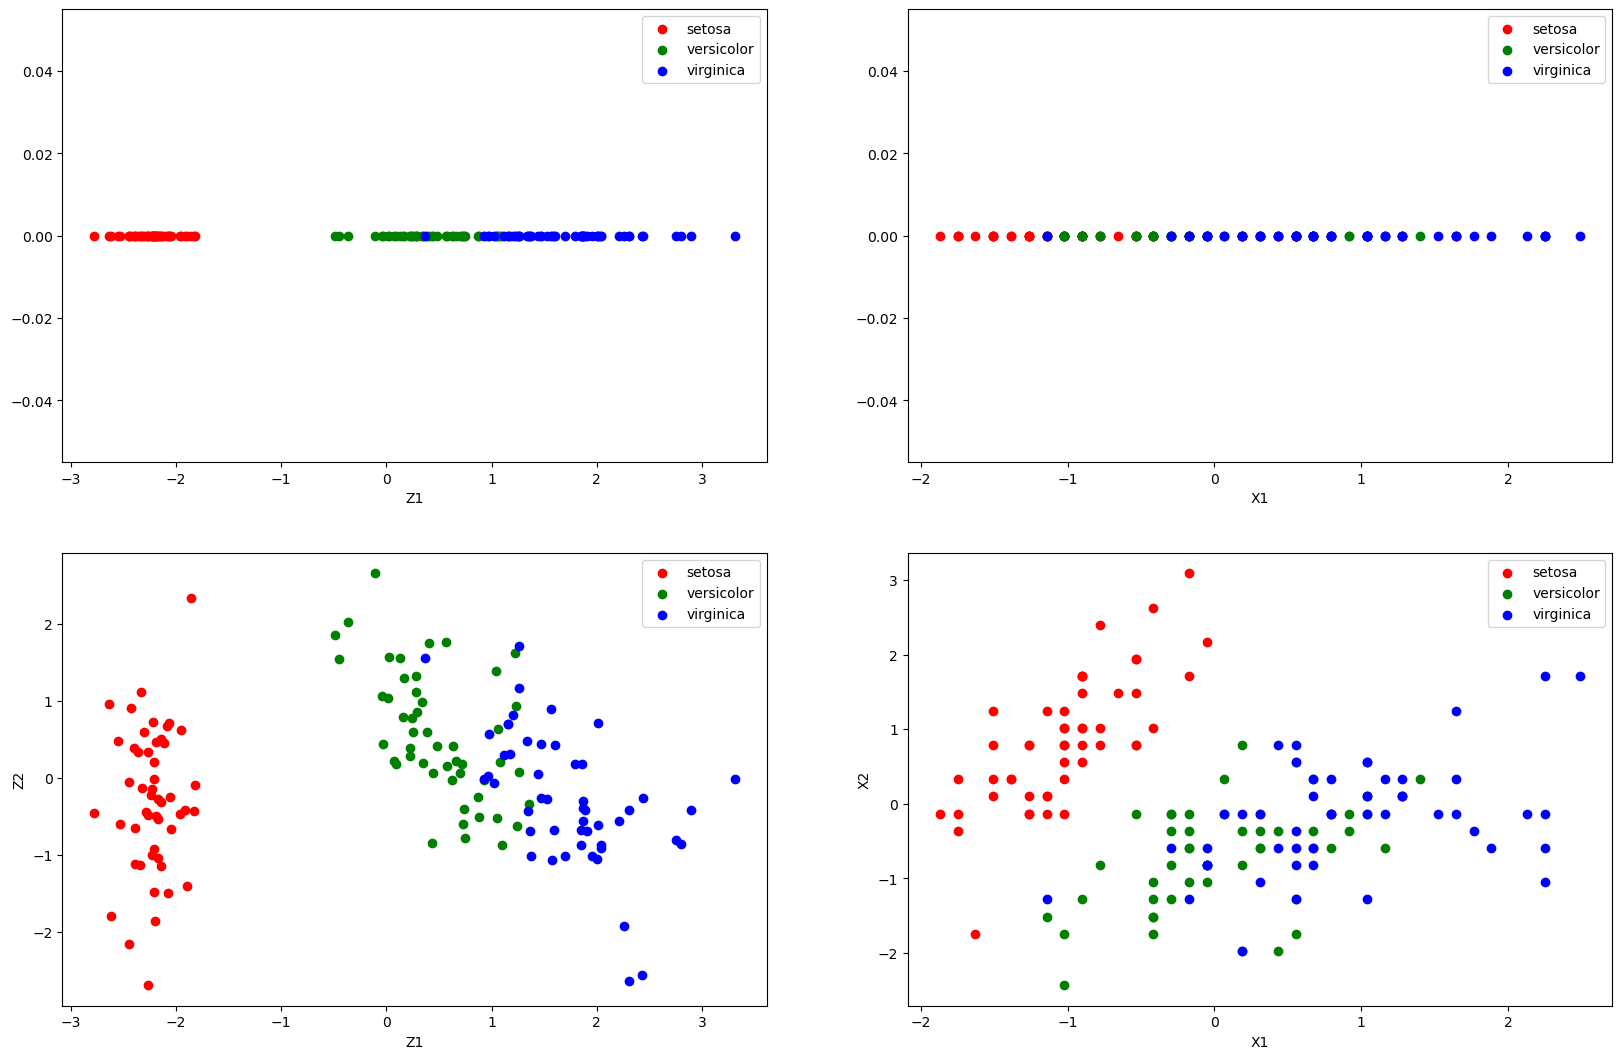

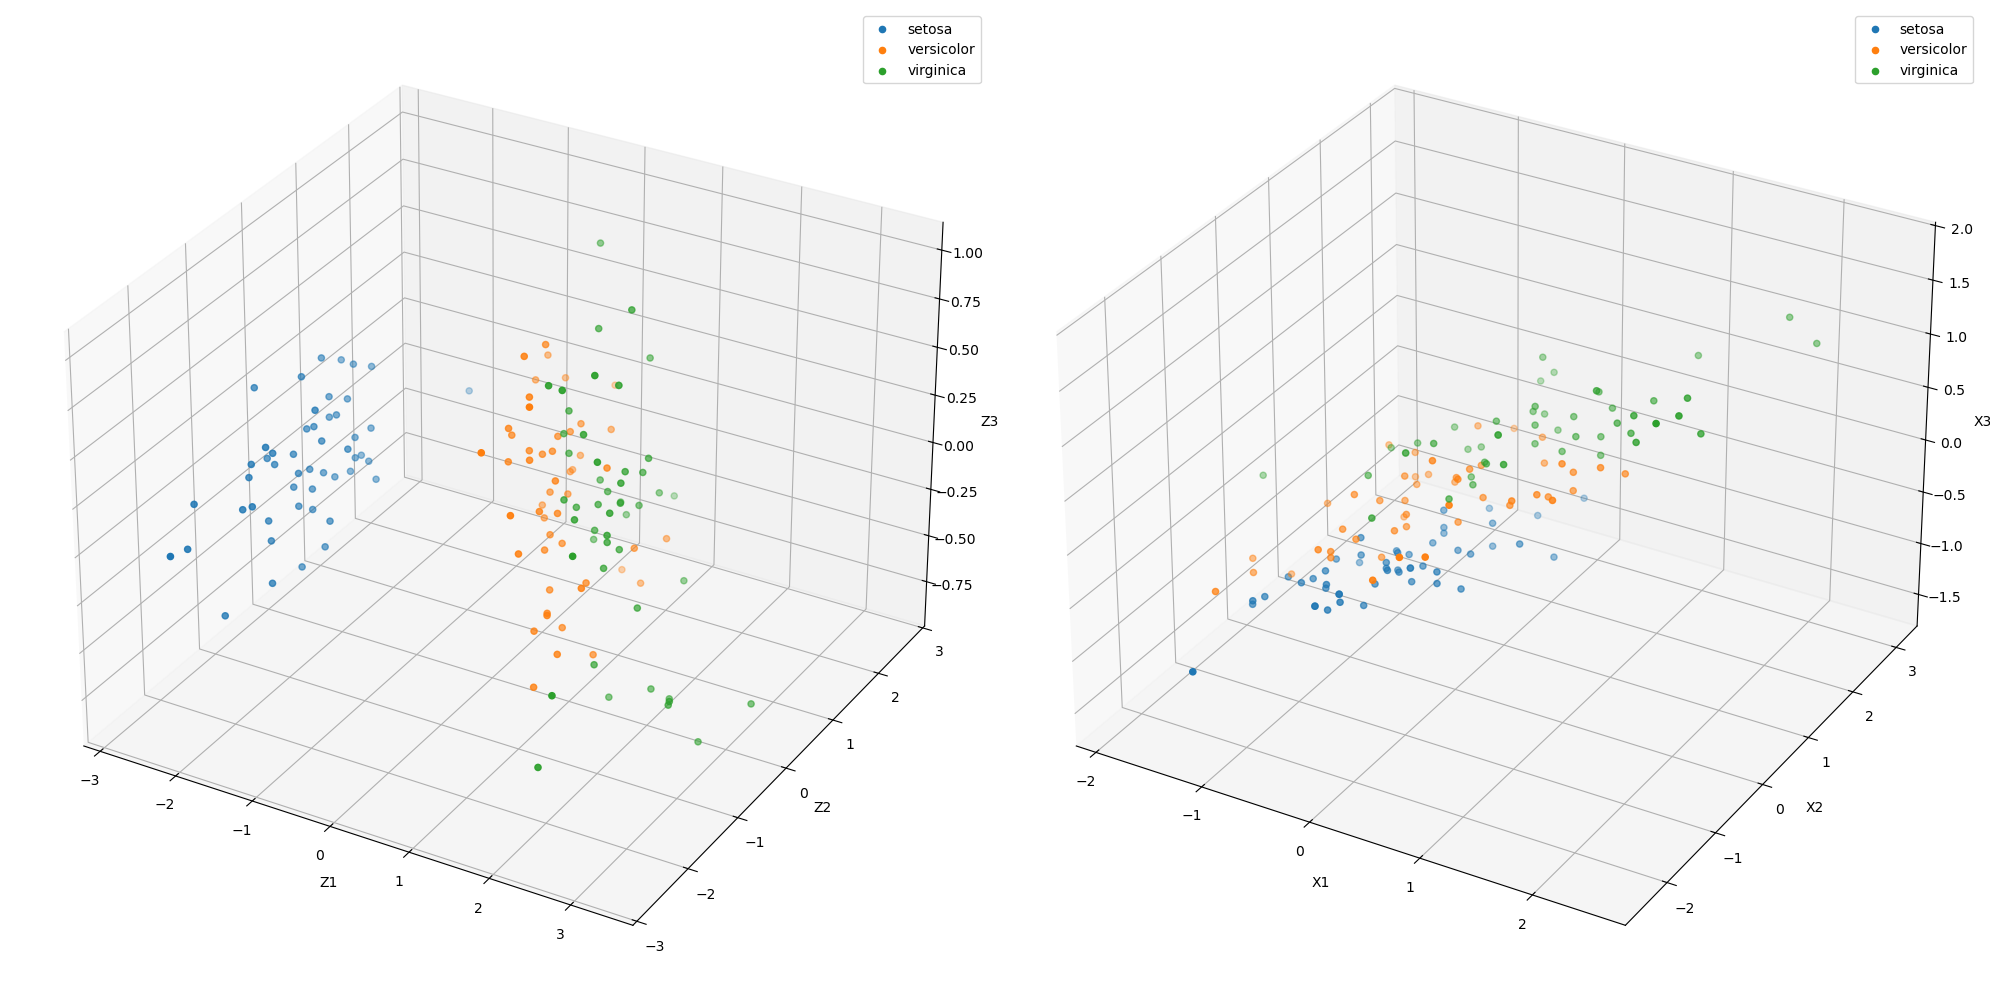

In [24]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['red', 'green', 'blue']
labels = ['setosa', 'versicolor', 'virginica']


plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1,)
for i in range(3):
    plt.scatter(Z1[y == i], np.zeros_like(Z1[y == i]), label=labels[i], c=colors[i])
plt.xlabel('Z1')
plt.legend()


plt.subplot(3, 2, 2)
for i in range(3):
    plt.scatter(X_scaled[y == i, 0], np.zeros_like(X_scaled[y == i, 0]), label=labels[i], c=colors[i])
plt.xlabel('X1')
plt.legend()


plt.subplot(3, 2, 3)
for i in range(3):
    plt.scatter(Z2[y == i, 0], Z2[y == i, 1], label=labels[i], c=colors[i])
plt.xlabel('Z1')
plt.ylabel('Z2')
plt.legend()


plt.subplot(3, 2, 4)
for i in range(3):
    plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], label=labels[i], c=colors[i])
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()


fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(121, projection='3d')
for i in range(3):
    ax.scatter(Z3[y == i, 0], Z3[y == i, 1], Z3[y == i, 2], label=labels[i])
ax.set_xlabel('Z1')
ax.set_ylabel('Z2')
ax.set_zlabel('Z3')
ax.legend()


ax2 = fig.add_subplot(122, projection='3d')
for i in range(3):
    ax2.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], X_scaled[y == i, 2], label=labels[i])
ax2.set_xlabel('X1')
ax2.set_ylabel('X2')
ax2.set_zlabel('X3')
ax2.legend()

plt.tight_layout()
plt.show()

## Zadanie 2

This lab on Principal Components Analysis is a python adaptation of p. 401-404, 408-410 of “Introduction
to Statistical Learning with Applications in R” by Gareth James, Daniela Witten, Trevor Hastie and Robert
Tibshirani. Original adaptation by J. Warmenhoven, updated by R. Jordan Crouser at Smith College for
SDS293: Machine Learning (Spring 2016).

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv('USArrests.csv', index_col=0)
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [35]:
df.info()

df.mean()

df.var()


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [40]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

from sklearn.decomposition import PCA
pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['V1', 'V2','V3','V4'])

print(pca_loadings)

                V1        V2        V3        V4
Murder    0.535899 -0.418181 -0.341233 -0.649228
Assault   0.583184 -0.187986 -0.268148  0.743407
UrbanPop  0.278191  0.872806 -0.378016 -0.133878
Rape      0.543432  0.167319  0.817778 -0.089024


In [41]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=X.index)
df_plot.head()

,PC1,PC2,PC3,PC4
Alabama,0.985566,-1.133392,-0.444269,-0.156267
Alaska,1.950138,-1.073213,2.040003,0.438583
Arizona,1.763164,0.745957,0.054781,0.834653
Arkansas,-0.141420,-1.119797,0.114574,0.182811
California,2.523980,1.542934,0.598557,0.341996


C:\Users\Szcze\AppData\Local\Temp\ipykernel_145192\1264749324.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
C:\Users\Szcze\AppData\Local\Temp\ipykernel_145192\1264749324.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
C:\Users\Szcze\AppData\Local\Temp\ipykernel_145192\1264749324.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

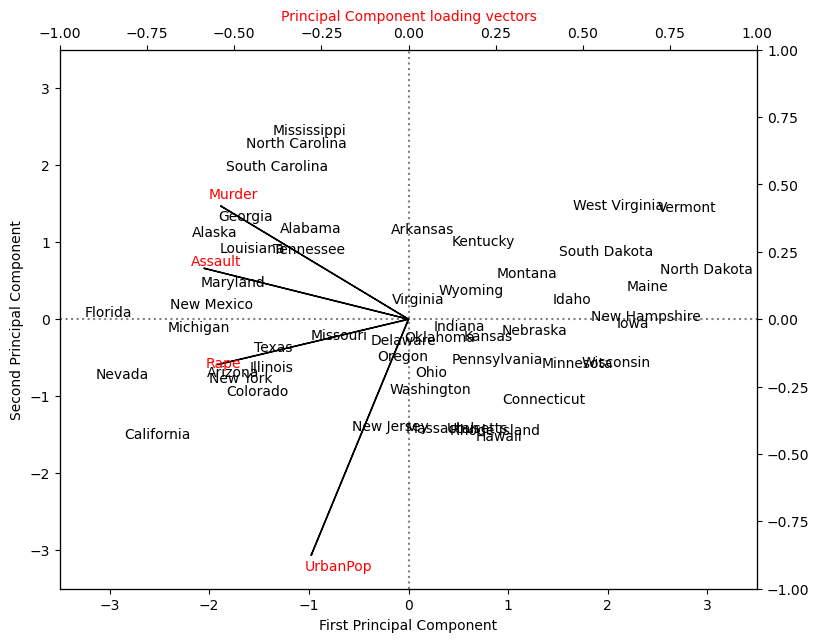

In [43]:
fig , ax1 = plt.subplots(figsize=(9,7))
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)
# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')
# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')
# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and t
a = 1.07
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (-pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')
# Plot vectors
ax2.arrow(0,0,-pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,-pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,-pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,-pca_loadings.V1[3], -pca_loadings.V2[3])

In [47]:
pca.explained_variance_


array([2.53085875, 1.00996444, 0.36383998, 0.17696948])

In [ ]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 , 0.04335752])

([<matplotlib.axis.XTick at 0x18d7adb30b0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

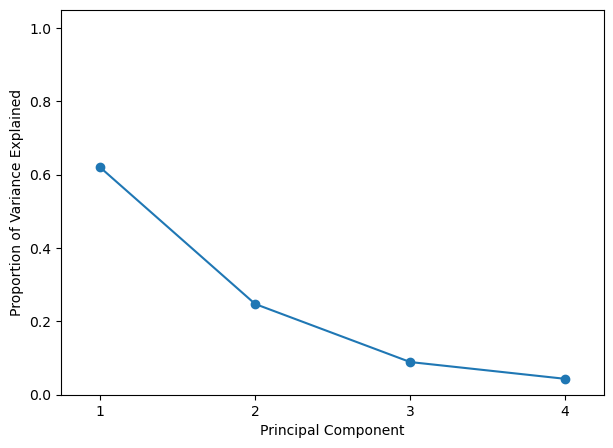

In [49]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])


([<matplotlib.axis.XTick at 0x18d7ae50ce0>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

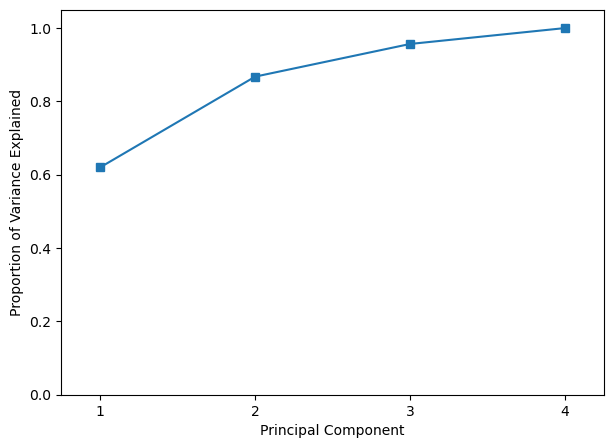

In [50]:
plt.figure(figsize=(7,5))
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])

In [51]:
df2 = pd.read_csv('NCI60.csv').drop('Unnamed: 0', axis=1)
df2.columns = np.arange(df2.columns.size)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Columns: 6830 entries, 0 to 6829
dtypes: float64(6830)
memory usage: 3.3 MB


In [52]:
# Read in the labels to check our work later
y = pd.read_csv('NCI60_y.csv', usecols=[1], skiprows=1, names=['type'])

In [53]:
# Scale the data
X = pd.DataFrame(scale(df2))
X.shape
# Fit the PCA model and transform X to get the principal components
pca2 = PCA()
df2_plot = pd.DataFrame(pca2.fit_transform(X))

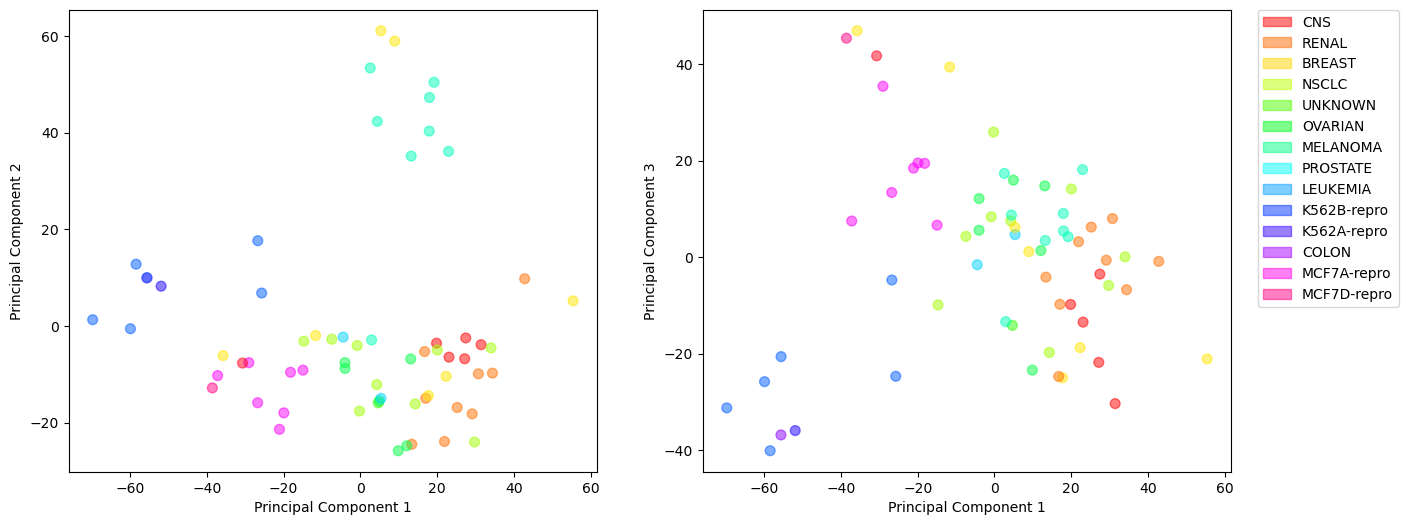

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
color_idx = pd.factorize(y.type)[0]
cmap = mpl.cm.hsv
# Left plot
ax1.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,1], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax1.set_ylabel('Principal Component 2')
# Right plot
ax2.scatter(df2_plot.iloc[:,0], df2_plot.iloc[:,2], c=color_idx, cmap=cmap, alpha=0.5, s=50)
ax2.set_ylabel('Principal Component 3')

handles = []
labels = pd.factorize(y.type.unique())
norm = mpl.colors.Normalize(vmin=0.0, vmax=14.0)
for i, v in zip(labels[0], labels[1]):
    handles.append(mpl.patches.Patch(color=cmap(norm(i)), label=v, alpha=0.5))
    ax2.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# xlabel for both plots
for ax in fig.axes:
    ax.set_xlabel('Principal Component 1')

In [57]:
pd.DataFrame([df2_plot.iloc[:,:5].std(axis=0, ddof=0).to_numpy(),
pca2.explained_variance_ratio_[:5],
np.cumsum(pca2.explained_variance_ratio_[:5])],
index=['Standard Deviation', 'Proportion of Variance', 'Cumulative Proportion'],
columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,27.853469,21.481355,19.820465,17.032556,15.971807
Proportion of Variance,0.113589,0.067562,0.057518,0.042476,0.037350
Cumulative Proportion,0.113589,0.181151,0.238670,0.281145,0.318495


Text(0, 0.5, 'Variances')

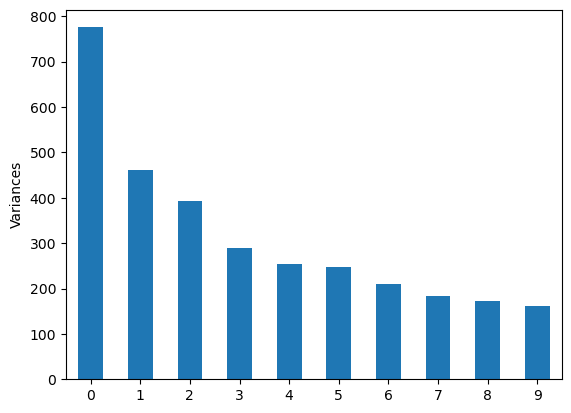

In [58]:
df2_plot.iloc[:,:10].var(axis=0, ddof=0).plot(kind='bar', rot=0)
plt.ylabel('Variances')

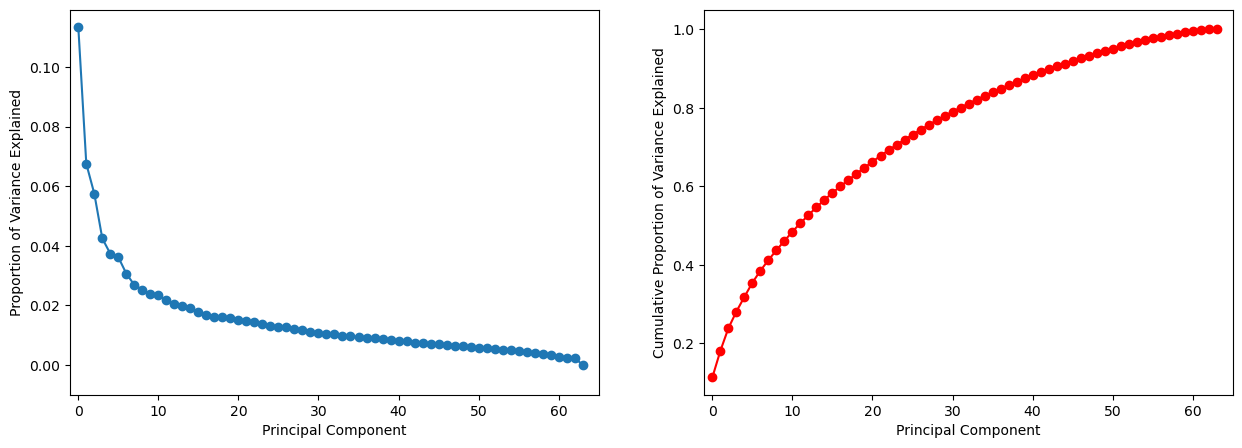

In [59]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
# Left plot
ax1.plot(pca2.explained_variance_ratio_, '-o')
ax1.set_ylabel('Proportion of Variance Explained')
ax1.set_ylim(ymin=-0.01)
# Right plot
4
ax2.plot(np.cumsum(pca2.explained_variance_ratio_), '-ro')
ax2.set_ylabel('Cumulative Proportion of Variance Explained')
ax2.set_ylim(ymax=1.05)
for ax in fig.axes:
    ax.set_xlabel('Principal Component')
    ax.set_xlim(-1,65)